# Set Up Environment

In [1]:
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

## Import Dataset

In [2]:
df = pd.read_csv("gold_price_crude_oil.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Data Understanding

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Crude Oil
Date,,,,,,,
2005-08-31,431.200012,431.200012,431.200012,433.799988,433.799988,10,68.940002
2005-09-01,438.500000,442.500000,438.500000,442.299988,442.299988,4,69.470001
2005-09-02,444.200012,444.200012,444.200012,444.200012,444.200012,4,67.570000
2005-09-06,444.399994,444.399994,444.399994,444.399994,444.399994,4,65.959999
2005-09-07,444.700012,444.700012,444.700012,444.899994,444.899994,1006,64.370003


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Crude Oil
Date,,,,,,,
2024-08-26,2509.899902,2523.100098,2509.100098,2517.699951,2517.699951,290,77.419998
2024-08-27,2515.199951,2523.100098,2506.899902,2516.000000,2516.000000,100,75.529999
2024-08-28,2501.000000,2501.000000,2501.000000,2501.000000,2501.000000,2353,74.519997
2024-08-29,2504.100098,2525.699951,2503.899902,2525.699951,2525.699951,3966,75.910004
2024-08-30,2519.500000,2525.399902,2493.800049,2493.800049,2493.800049,208,73.550003


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Crude Oil
count,4779.000000,4779.000000,4779.000000,4779.000000,4779.000000,4779.000000,4778.000000
mean,1347.430362,1354.347249,1340.187780,1347.341200,1347.341200,5002.388575,72.518041
std,428.399148,430.615124,426.292668,428.488778,428.488778,26956.353236,21.715250
min,431.200012,431.200012,431.200012,433.799988,433.799988,0.000000,-37.630001
25%,1119.300049,1125.449951,1111.600037,1118.200012,1118.200012,36.500000,55.982501
50%,1297.300049,1303.699951,1292.599976,1297.699951,1297.699951,137.000000,71.785000
75%,1705.799988,1714.200012,1694.450012,1704.900024,1704.900024,461.000000,89.025000
max,2519.500000,2527.300049,2509.100098,2525.699951,2525.699951,386334.000000,145.289993


Noticed that the values for Close and Adj Close price are totally same, may remove it in the next phase.

In [6]:
df.shape

(4779, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4779 entries, 2005-08-31 to 2024-08-30
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4779 non-null   float64
 1   High       4779 non-null   float64
 2   Low        4779 non-null   float64
 3   Close      4779 non-null   float64
 4   Adj Close  4779 non-null   float64
 5   Volume     4779 non-null   int64  
 6   Crude Oil  4778 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 298.7 KB


In [8]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Crude Oil    1
dtype: int64

## Data Visualization

Here is the Historical Close Price of Gold and S&P500

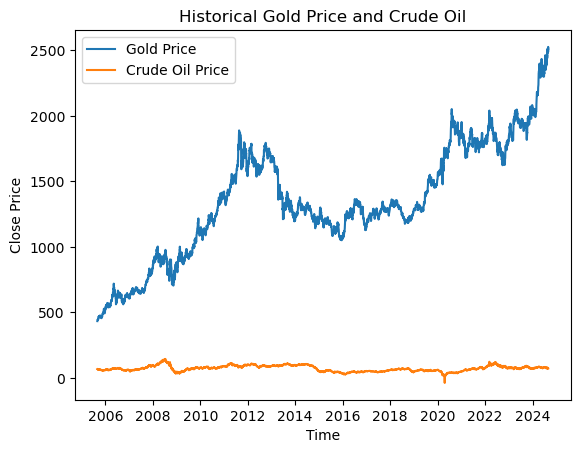

In [9]:
plt.plot(df.index, df.Close, label = 'Gold Price')
plt.plot(df.index, df['Crude Oil'], label = 'Crude Oil Price')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Historical Gold Price and Crude Oil')
plt.legend()
plt.show()

The evolution of some features over time:

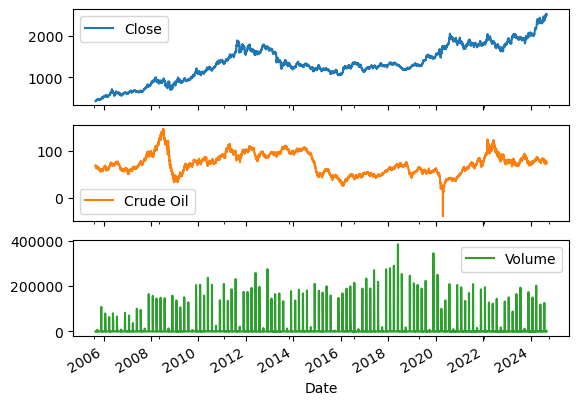

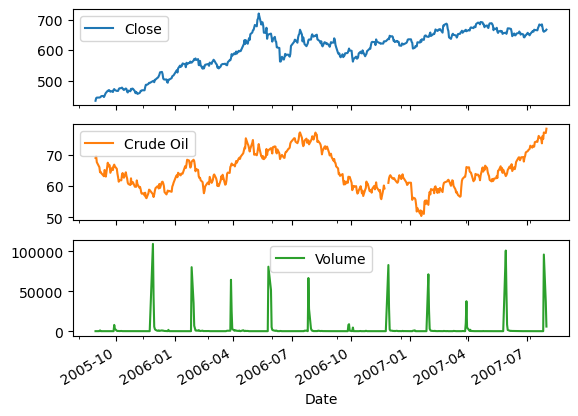

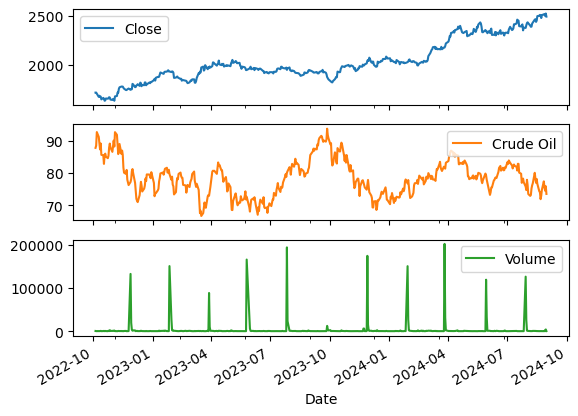

In [10]:
plot_cols = ['Close', 'Crude Oil', 'Volume']
plot_features = df[plot_cols]
plot_features.index = df.index
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = df.index[:480]
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][-480:]
plot_features.index = df.index[-480:]
_ = plot_features.plot(subplots=True)

D:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
D:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
D:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


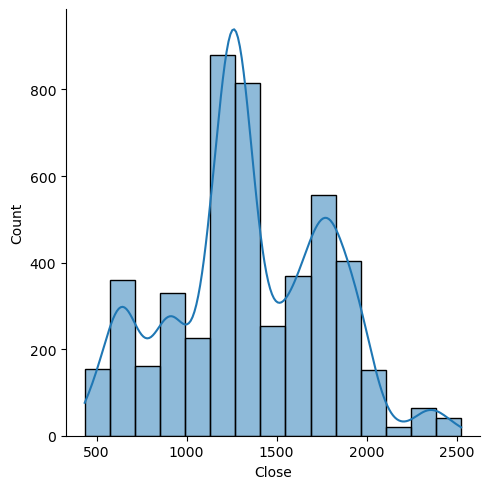

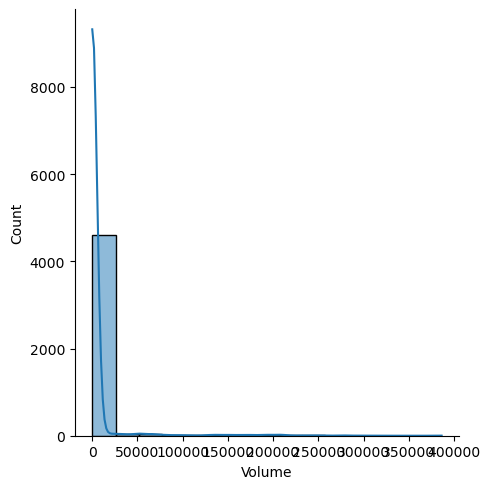

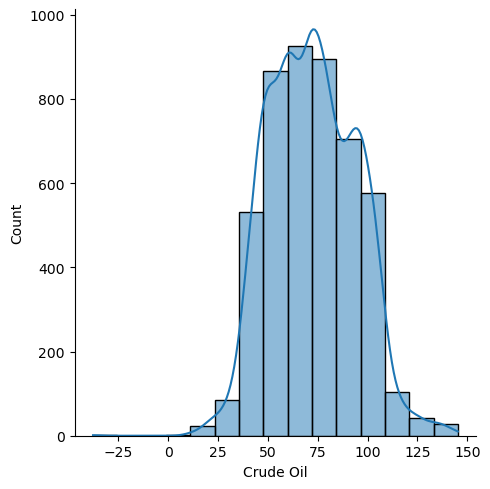

In [11]:
sns.displot(df.Close, kde=True, bins=15)
sns.displot(df.Volume, kde=True, bins=15)
sns.displot(df['Crude Oil'], kde=True, bins=15)

# Data Preparation

## Feature Selection
Since the Adj Close is totally same with Close, and the Volume is extremely skewed to the left, we have remove Adj Close and Volume in the dataset.

In [12]:
df.drop(['Adj Close'], axis=1, inplace = True)

In [13]:
df.head(3)

,Open,High,Low,Close,Volume,Crude Oil
Date,,,,,,
2005-08-31,431.200012,431.200012,431.200012,433.799988,10,68.940002
2005-09-01,438.500000,442.500000,438.500000,442.299988,4,69.470001
2005-09-02,444.200012,444.200012,444.200012,444.200012,4,67.570000


## Handling Missing Value
By forward fill the last known value

In [14]:
df = df.fillna(method='ffill')
df.isnull().any()

Open         False
High         False
Low          False
Close        False
Volume       False
Crude Oil    False
dtype: bool

### Split the Data into Train and Test set

In [15]:
# Define the split time
split_time = int(len(df) *0.8)

# Get the Train Set
train_df = df[:split_time]
train_date = df.index[:split_time]
print("Shape of Train set: ", train_df.shape)

# Get the Validation Set
test_df = df[split_time:]
test_date = df.index[split_time:]
print("Shape of Test set: ", test_df.shape)

Shape of Train set:  (3823, 6)
Shape of Test set:  (956, 6)


### Scaling Features to normalizing the range

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_df_scaled = scaler.fit_transform(train_df)
test_df_scaled = scaler.fit_transform(test_df)
print("Sample of Scaled Train Df: \n",train_df_scaled)
print("\nSample of Scaled Test Df: \n",test_df_scaled)

Sample of Scaled Train Df: 
 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.58843384e-05 5.82604454e-01]
 [4.52207635e-03 6.92486081e-03 4.53753596e-03 5.25437345e-03
  1.03537354e-05 5.85501889e-01]
 [8.05302614e-03 7.96666264e-03 8.08055700e-03 6.42889555e-03
  1.03537354e-05 5.75114826e-01]
 ...
 [9.44310212e-01 9.38840514e-01 8.80096951e-01 8.77418528e-01
  1.92838321e-03 4.25978594e-01]
 [8.97045188e-01 8.91101880e-01 8.95077045e-01 8.91141760e-01
  7.14407740e-04 4.31828144e-01]
 [8.96735457e-01 8.87118549e-01 8.85318249e-01 8.82054740e-01
  5.74632313e-04 4.32320163e-01]]

Sample of Scaled Test Df: 
 [[2.76498701e-01 2.82300831e-01 2.81319872e-01 2.76263247e-01
  1.04870271e-03 1.18463314e-02]
 [2.85396488e-01 2.95132662e-01 2.92729348e-01 2.90780065e-01
  1.14403932e-03 0.00000000e+00]
 [2.82727125e-01 2.92035398e-01 2.86241599e-01 2.92553223e-01
  2.86009829e-05 1.44788697e-02]
 ...
 [9.79423868e-01 9.70907026e-01 9.90939489e-01 9.72628597e-01
  1.12163521e-

### Prepare Features and Labels

In [17]:
# Split X and Y
def createXy(dataset, window_size):
    X = []
    y = []
    for i in range (window_size, len(dataset)):
        X.append(dataset[i-window_size:i, 0:dataset.shape[1]])
        y.append(dataset[i,0])
    return np.array(X), np.array(y)

X_train, y_train = createXy(train_df_scaled, 30)
X_test, y_test = createXy(test_df_scaled, 30)
print("X_train Shape: ", X_train.shape)
print("y_train Shape: ", y_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (3793, 30, 6)
y_train Shape:  (3793,)
X_test Shape:  (926, 30, 6)
y_test Shape:  (926,)


In case you provide a 30 days data of all the features, the close price of gold on 31st day will be the answer of the input.

In [18]:
print("with first 30 trading input X_train: \n", X_train[0])
print("the output on 31st is y_train: ", y_train[0])

with first 30 trading input X_train: 
 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.58843384e-05 5.82604454e-01]
 [4.52207635e-03 6.92486081e-03 4.53753596e-03 5.25437345e-03
  1.03537354e-05 5.85501889e-01]
 [8.05302614e-03 7.96666264e-03 8.08055700e-03 6.42889555e-03
  1.03537354e-05 5.75114826e-01]
 [8.17690751e-03 8.08921546e-03 8.20486188e-03 6.55251655e-03
  1.03537354e-05 5.66313161e-01]
 [8.36275791e-03 8.27307274e-03 8.39134765e-03 6.86159734e-03
  2.60396445e-03 5.57620856e-01]
 [9.60168501e-03 9.49871315e-03 9.63451027e-03 7.97429951e-03
  1.55306031e-05 5.58276854e-01]
 [1.10264436e-02 1.09081921e-02 1.10641397e-02 9.39606360e-03
  1.55306031e-05 5.56035458e-01]
 [1.14600757e-02 1.13371738e-02 1.14992542e-02 9.82878426e-03
  1.55306031e-05 5.51935305e-01]
 [9.23000310e-03 9.13101729e-03 9.26155769e-03 7.60339879e-03
  1.55306031e-05 5.50732587e-01]
 [1.15220069e-02 1.13984408e-02 1.15613971e-02 9.89058532e-03
  1.55306031e-05 5.61556968e-01]
 [1.5052956

# Modelling

## LSTM - 1

In [19]:
# Reset states generated byu Keras
tf.keras.backend.clear_session()

# Build the model
lstm1_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2])),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

# Print the model summary
lstm1_model.summary()

D:\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 50)              │          11,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,651 (123.64 KB)

 Trainable params: 31,651 (123.64 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
lstm1_model.compile(loss='mean_squared_error',
              optimizer= 'adam')
history = lstm1_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0464 - val_loss: 0.0014
Epoch 2/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0028 - val_loss: 0.0010
Epoch 3/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0021 - val_loss: 4.6740e-04
Epoch 4/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0019 - val_loss: 4.7726e-04
Epoch 5/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0017 - val_loss: 3.6668e-04
Epoch 6/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0016 - val_loss: 3.7925e-04
Epoch 7/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 8/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0016 - val_loss: 3.6071e-04
Epoch 9/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0013 - val_loss: 2.8353e-04
Epoch 10/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 11/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0013 - val_loss: 3.1792e-04
Epoch 12/100
95/95 ━━━━━

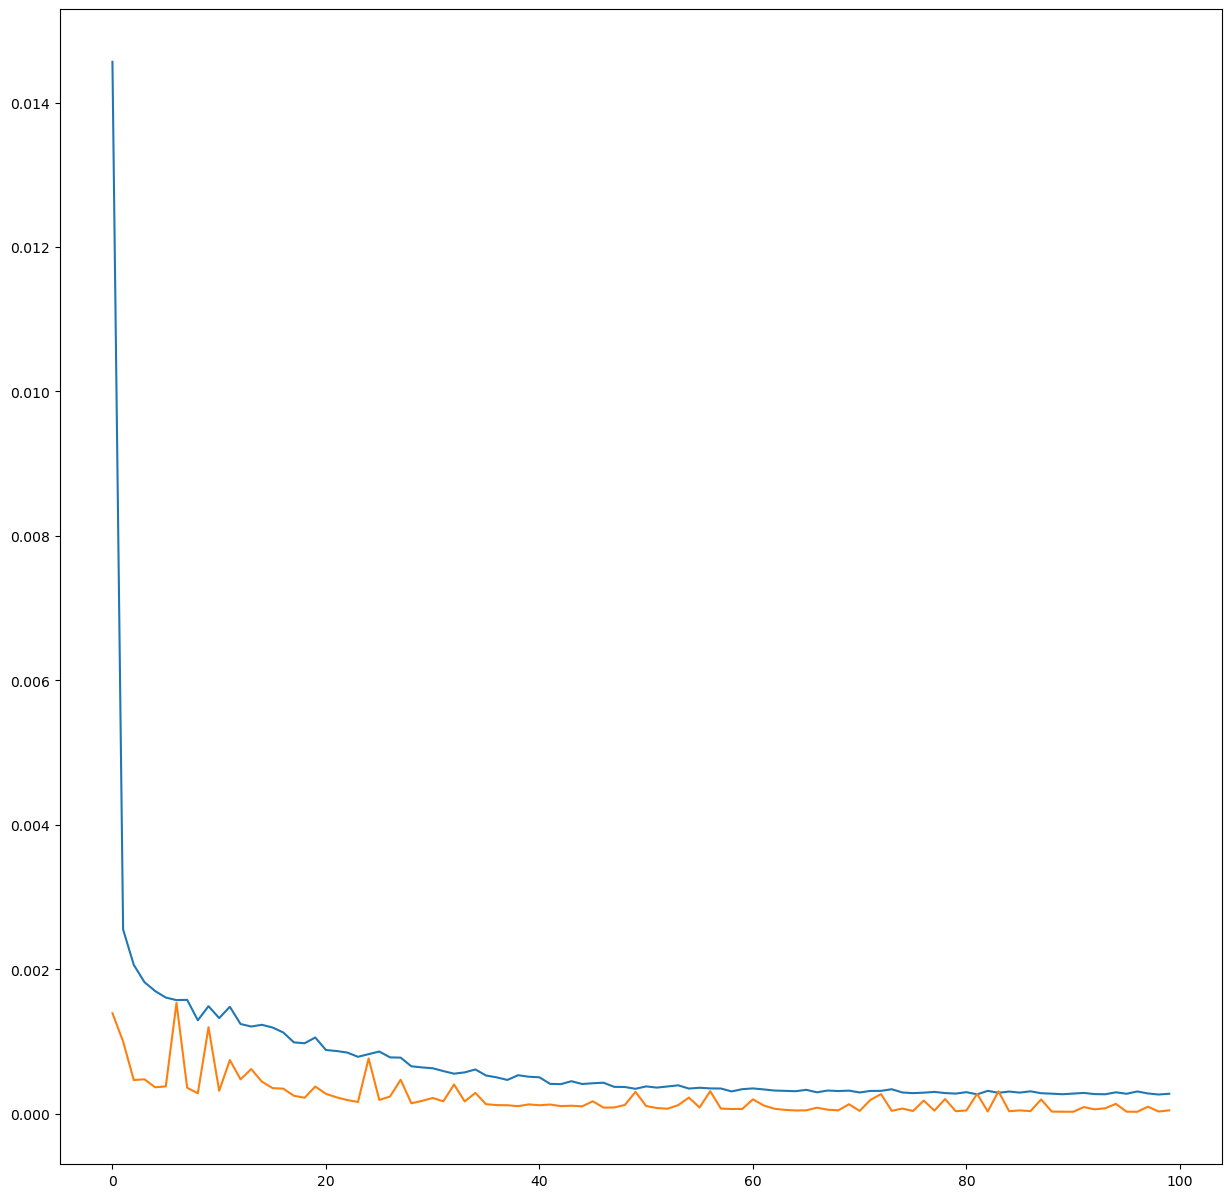

In [21]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(15,15))
plt.plot(range(100), loss, label="Training Loss")
plt.plot(range(100), val_loss, label="Validation Loss")
plt.show()

## LSTM - 2

In [22]:
# Reset states generated byu Keras
tf.keras.backend.clear_session()

# Build the model
lstm2_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2])),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

# Print the model summary
lstm2_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 64)              │          18,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,265 (200.25 KB)

 Trainable params: 51,265 (200.25 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
lstm2_model.compile(loss='mean_squared_error',
              optimizer= 'adam')
history = lstm2_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0260 - val_loss: 0.0012
Epoch 2/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0070 - val_loss: 7.6390e-04
Epoch 3/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0062 - val_loss: 4.1861e-04
Epoch 4/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0050 - val_loss: 8.0182e-04
Epoch 5/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0043 - val_loss: 0.0013
Epoch 6/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0040 - val_loss: 3.2025e-04
Epoch 7/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0034 - val_loss: 5.6084e-04
Epoch 8/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0032 - val_loss: 3.2351e-04
Epoch 9/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0031 - val_loss: 3.1832e-04
Epoch 10/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0028 - val_loss: 9.3166e-04
Epoch 11/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0027 - val_loss: 0.0024
Epoch 12/100
95/95 ━

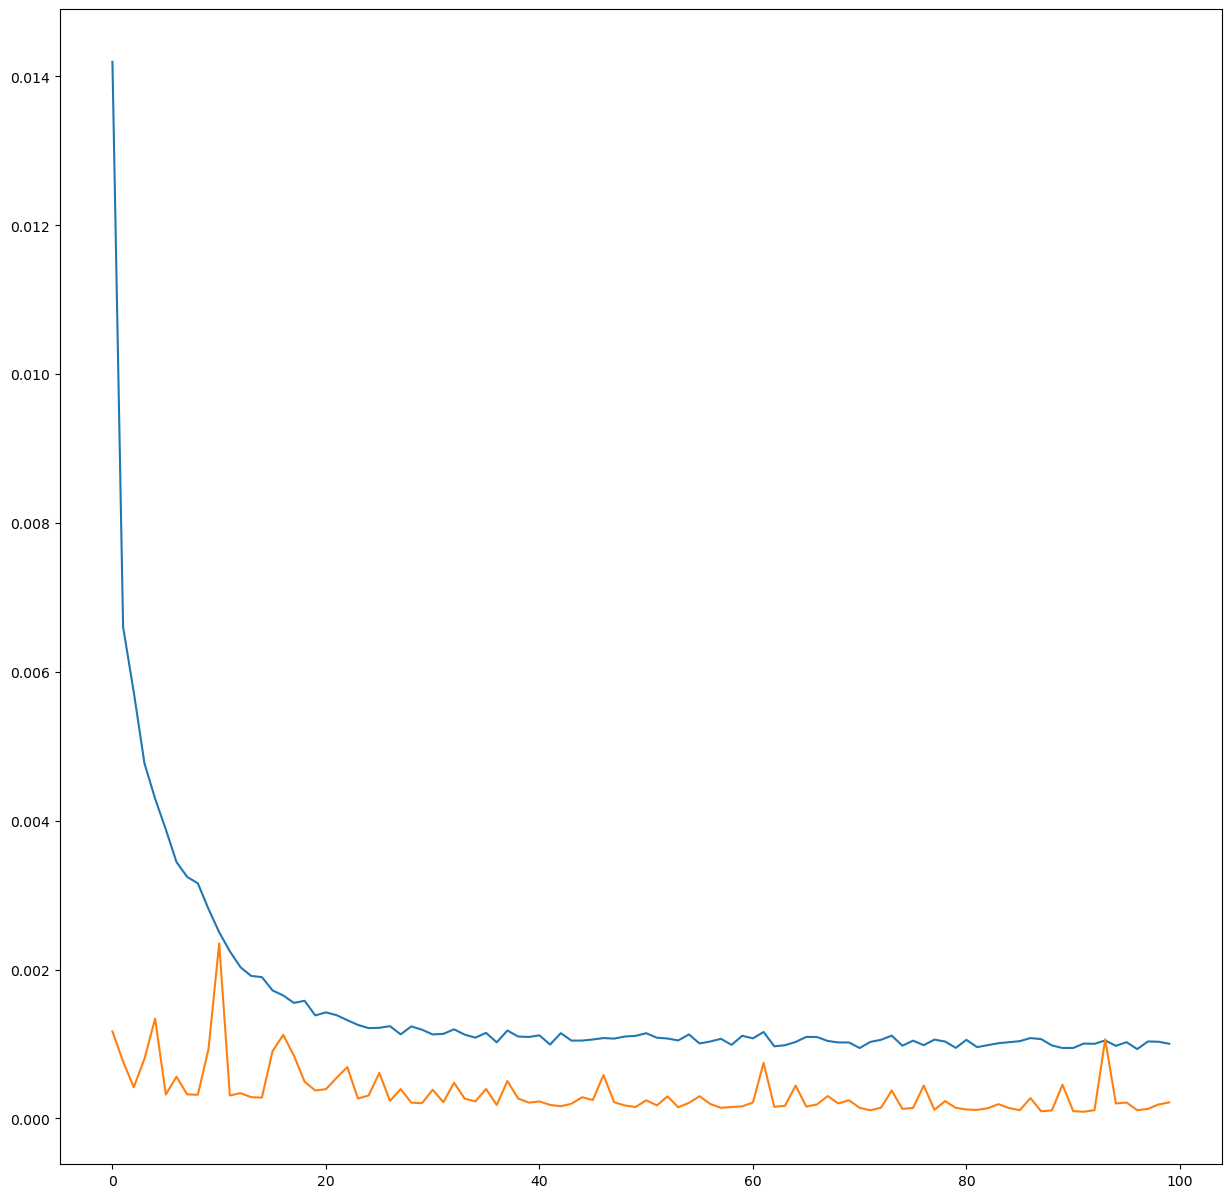

In [24]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(15,15))
plt.plot(range(100), loss, label="Training Loss")
plt.plot(range(100), val_loss, label="Validation Loss")
plt.show()

# 1D Convolutional Neural Network (CNN)

In [25]:
# Reset states generated byu Keras
tf.keras.backend.clear_session()

cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(64, kernel_size=3, input_shape=(X_train.shape[1],X_train.shape[2]), activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

cnn_model.summary()

D:\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 28, 64)              │           1,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 14, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 12, 32)              │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 6, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 192)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,809 (77.38 KB)

 Trainable params: 19,809 (77.38 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
cnn_model.compile(optimizer='adam', loss='mean_squared_error')  # Using mean squared error as the loss function

# Train the model
history = cnn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0213 - val_loss: 5.8785e-04
Epoch 2/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.6669e-04 - val_loss: 4.2311e-04
Epoch 3/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.4068e-04 - val_loss: 4.1030e-04
Epoch 4/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.2002e-04 - val_loss: 3.3012e-04
Epoch 5/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.9119e-04 - val_loss: 4.5799e-04
Epoch 6/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.4818e-04 - val_loss: 4.3772e-04
Epoch 7/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.9410e-04 - val_loss: 3.0740e-04
Epoch 8/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.8891e-04 - val_loss: 2.9747e-04
Epoch 9/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.0215e-04 - val_loss: 2.4995e-04
Epoch 10/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.4838e-04 - val_loss: 2.9913e-04
Epoch 11/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.4105e-04 - 

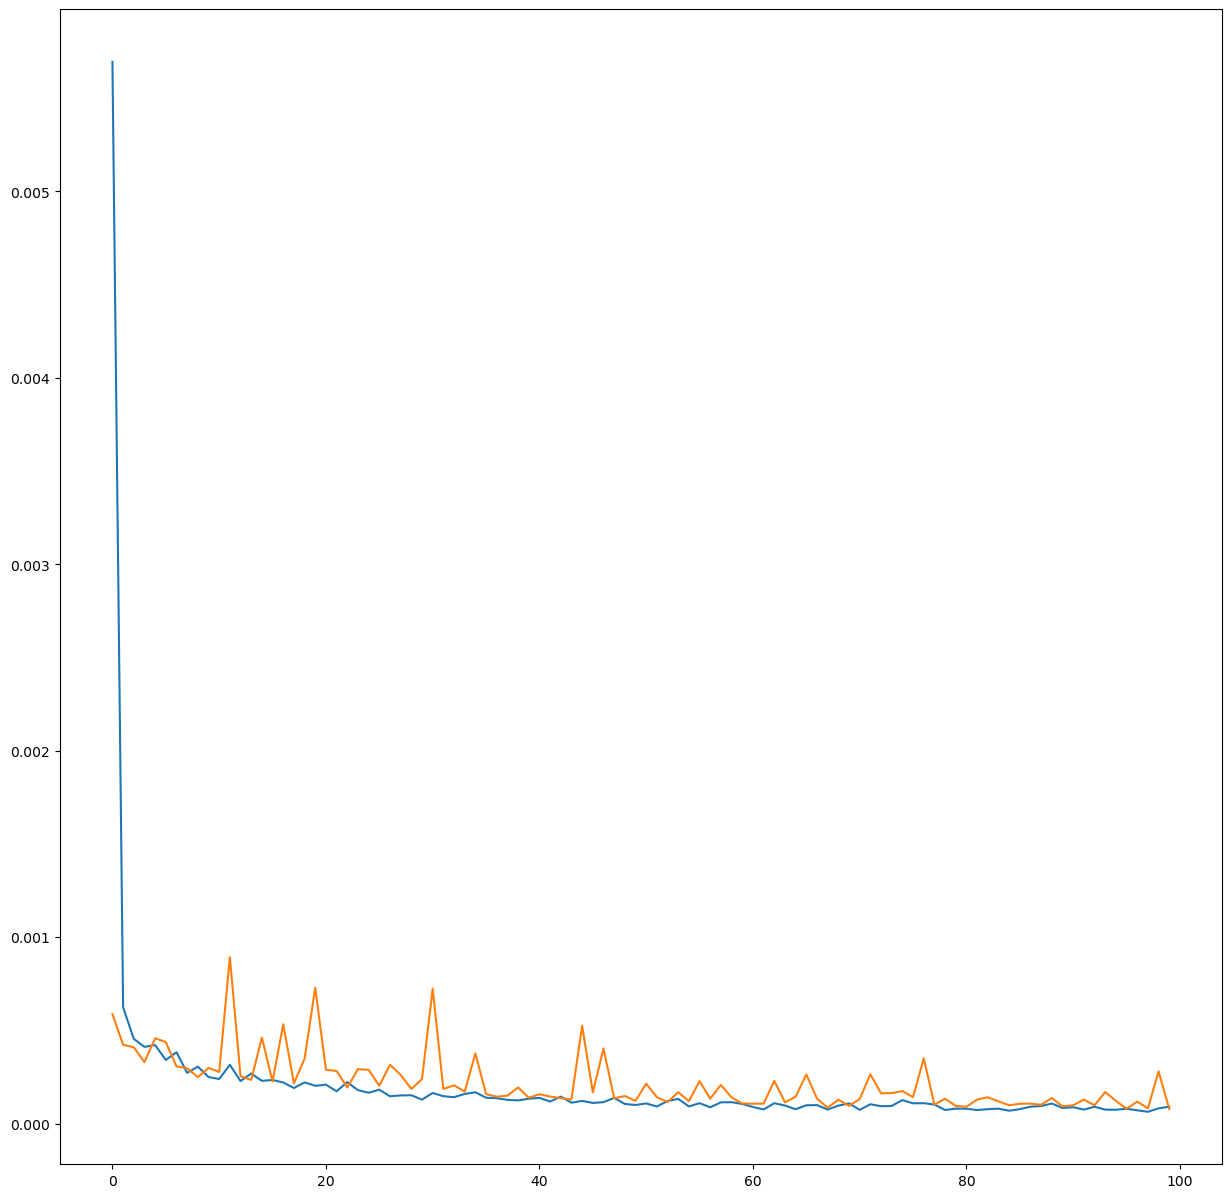

In [27]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(15,15))
plt.plot(range(100), loss, label="Training Loss")
plt.plot(range(100), val_loss, label="Validation Loss")
plt.show()

## CNN-LSTM

In [28]:
# Reset states generated byu Keras
tf.keras.backend.clear_session()

cnnlstm_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(64, kernel_size=3, input_shape=(X_train.shape[1],X_train.shape[2]), activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.LSTM(100, return_sequences=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(1)
])

cnnlstm_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 28, 64)              │           1,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 14, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 100)                 │          66,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           2,525 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 69,767 (272.53 KB)

 Trainable params: 69,767 (272.53 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
cnnlstm_model.compile(optimizer='adam', loss='mean_squared_error')  # Using mean squared error as the loss function

# Train the model
history = cnnlstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0279 - val_loss: 8.9264e-04
Epoch 2/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0018 - val_loss: 6.2361e-04
Epoch 3/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0013 - val_loss: 3.8835e-04
Epoch 4/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0011 - val_loss: 3.9852e-04
Epoch 5/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 9.3813e-04 - val_loss: 2.8011e-04
Epoch 6/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 9.1415e-04 - val_loss: 4.5773e-04
Epoch 7/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 7.5260e-04 - val_loss: 3.6474e-04
Epoch 8/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 7.7789e-04 - val_loss: 4.3259e-04
Epoch 9/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.8752e-04 - val_loss: 3.6519e-04
Epoch 10/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 6.1036e-04 - val_loss: 0.0011
Epoch 11/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 6.1166e-04 - val_lo

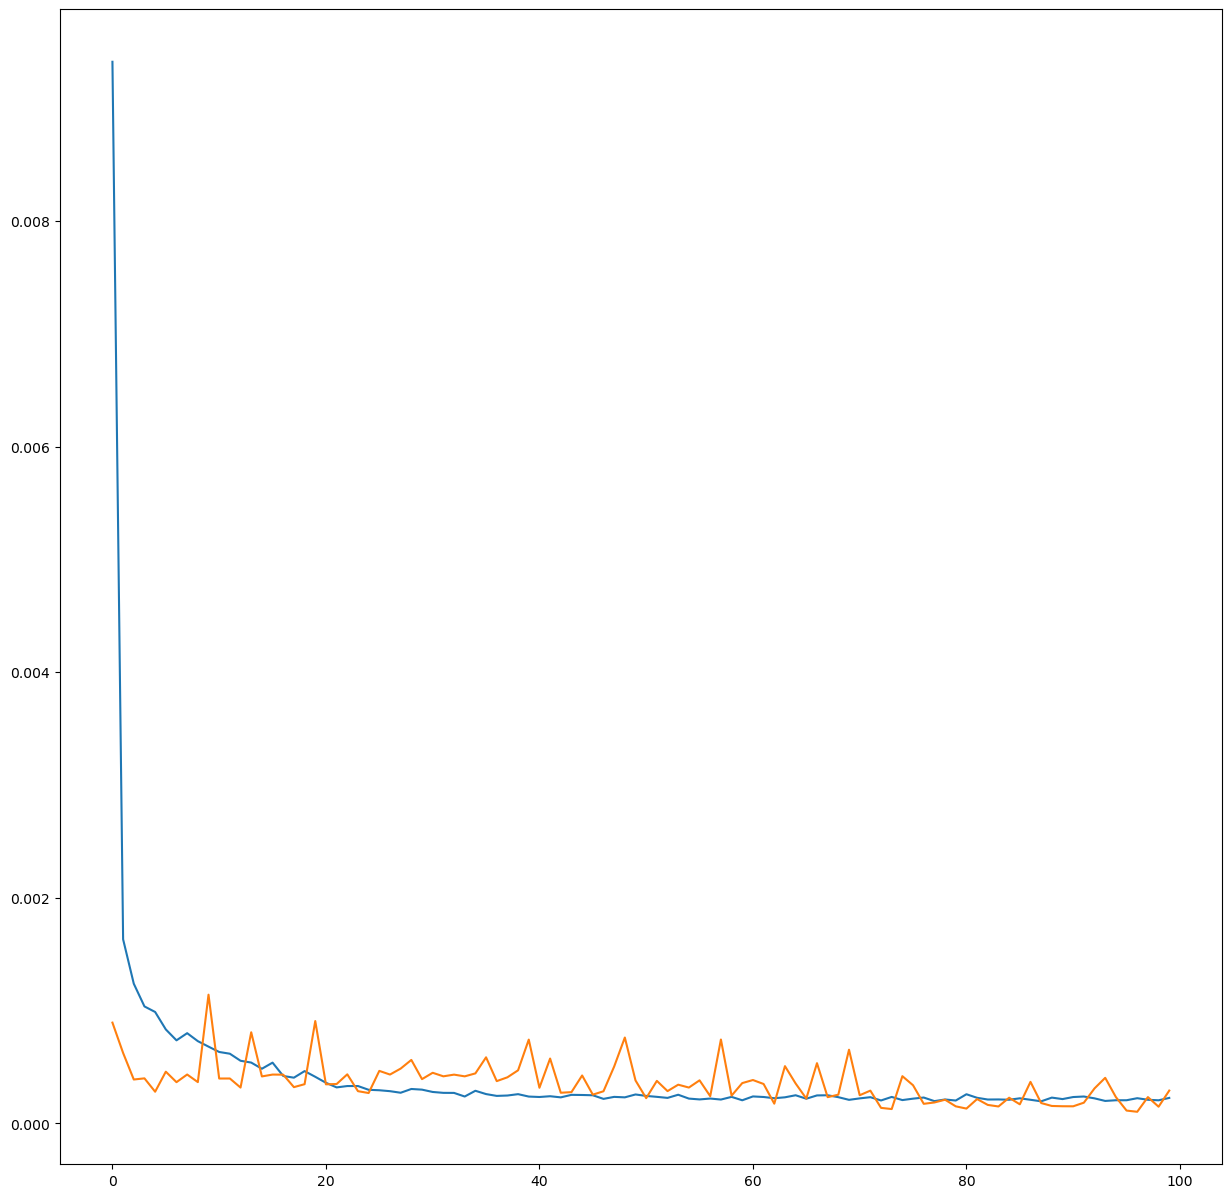

In [30]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(15,15))
plt.plot(range(100), loss, label="Training Loss")
plt.plot(range(100), val_loss, label="Validation Loss")
plt.show()

## Predict with Test Set

In [31]:
lstm1_predictions = lstm1_model.predict(X_test)
lstm2_predictions = lstm2_model.predict(X_test)
cnn_predictions = cnn_model.predict(X_test)
cnnlstm_predictions = cnnlstm_model.predict(X_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [32]:
lstm1_predictions_copy = np.repeat(lstm1_predictions, 6, axis=-1)
lstm1_predictions_inverse = scaler.inverse_transform(np.reshape(lstm1_predictions_copy, (len(lstm1_predictions),6)))[:,0]

lstm2_predictions_copy = np.repeat(lstm2_predictions, 6, axis=-1)
lstm2_predictions_inverse = scaler.inverse_transform(np.reshape(lstm2_predictions_copy, (len(lstm2_predictions),6)))[:,0]

cnn_predictions_copy = np.repeat(cnn_predictions, 6, axis=-1)
cnn_predictions_inverse = scaler.inverse_transform(np.reshape(cnn_predictions_copy, (len(cnn_predictions),6)))[:,0]

cnnlstm_predictions_copy = np.repeat(cnnlstm_predictions, 6, axis=-1)
cnnlstm_predictions_inverse = scaler.inverse_transform(np.reshape(cnnlstm_predictions_copy, (len(cnnlstm_predictions),6)))[:,0]

y_test_copy = np.repeat(y_test, 6, axis=-1)
y_test_inverse = scaler.inverse_transform(np.reshape(y_test_copy,(len(y_test),6)))[:,0]

print("Pred Values for LSTM - 1 -- " ,lstm1_predictions_inverse)
print("Pred Values for LSTM - 2 -- " ,lstm2_predictions_inverse)
print("Pred Values for CNN-- " ,cnn_predictions_inverse)
print("Pred Values for CNN-LSTM -- " ,cnnlstm_predictions_inverse)
print("\nOriginal Values-- " ,y_test_inverse)

Pred Values for LSTM - 1 --  [1880.8969 1885.2537 1885.4048 1891.7384 1898.9064 1931.0762 1953.582
 1938.8033 1924.8354 1880.0385 1851.9227 1846.7172 1853.2786 1853.0336
 1840.0627 1836.8821 1856.1517 1869.1416 1864.9695 1862.984  1858.6213
 1855.768  1852.7302 1857.6448 1864.7643 1852.8005 1842.5748 1817.978
 1809.8782 1823.021  1836.79   1846.3259 1840.5922 1829.9672 1814.3358
 1791.0282 1779.8322 1778.4017 1795.6622 1807.1766 1807.4666 1794.5096
 1761.6244 1739.7756 1730.9602 1724.8962 1716.5903 1707.2488 1697.0938
 1704.7966 1717.351  1728.3922 1726.2139 1729.7511 1733.214  1736.9
 1738.5908 1741.8663 1742.5801 1734.7772 1734.7262 1733.3274 1734.2004
 1726.6646 1709.1505 1706.2903 1717.6492 1727.1982 1738.7772 1744.377
 1753.0402 1751.9358 1743.9158 1743.461  1743.1884 1756.0046 1773.2933
 1780.1509 1780.059  1787.9664 1789.5107 1787.232  1782.849  1782.148
 1777.7954 1776.595  1772.9409 1785.8787 1786.5205 1786.7393 1803.3341
 1829.0428 1842.3322 1842.3339 1832.0767 1825.9384 1834

### Graph of Predictions

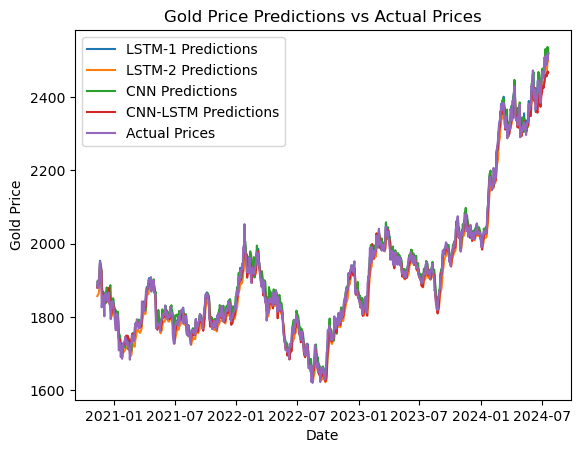

In [33]:
plt.plot(test_date[:-30], lstm1_predictions_inverse, label="LSTM-1 Predictions")
plt.plot(test_date[:-30], lstm2_predictions_inverse, label="LSTM-2 Predictions")
plt.plot(test_date[:-30], cnn_predictions_inverse, label="CNN Predictions")
plt.plot(test_date[:-30], cnnlstm_predictions_inverse, label="CNN-LSTM Predictions")
plt.plot(test_date[:-30], y_test_inverse, label="Actual Prices")
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.title("Gold Price Predictions vs Actual Prices")
plt.legend()

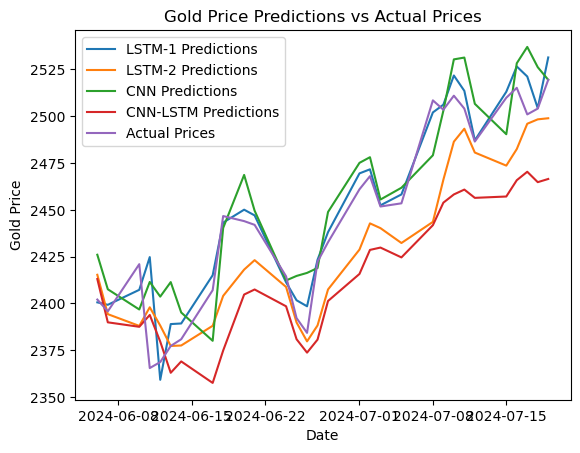

In [34]:
plt.plot(test_date[-60:-30], lstm1_predictions_inverse[-30:], label="LSTM-1 Predictions")
plt.plot(test_date[-60:-30], lstm2_predictions_inverse[-30:], label="LSTM-2 Predictions")
plt.plot(test_date[-60:-30], cnn_predictions_inverse[-30:], label="CNN Predictions")
plt.plot(test_date[-60:-30], cnnlstm_predictions_inverse[-30:], label="CNN-LSTM Predictions")
plt.plot(test_date[-60:-30], y_test_inverse[-30:], label="Actual Prices")
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.title("Gold Price Predictions vs Actual Prices")
plt.legend()

# Evaluation Metrics

In [35]:
def calculate_rmse(y_pred, y_true):
    return np.sqrt(np.mean((y_pred - y_true)**2))

rmse_lstm1 = calculate_rmse(lstm1_predictions_inverse, y_test_inverse)
rmse_lstm2 = calculate_rmse(lstm2_predictions_inverse, y_test_inverse)
rmse_cnn = calculate_rmse(cnn_predictions_inverse, y_test_inverse)
rmse_cnnlstm = calculate_rmse(cnnlstm_predictions_inverse, y_test_inverse)

print("The RMSE for LSTM - 1: ", rmse_lstm1)
print("The RMSE for LSTM - 2: ", rmse_lstm2)
print("The RMSE for CNN: ", rmse_cnn)
print("The RMSE for CNN-LSTM: ", rmse_cnnlstm)

The RMSE for LSTM - 1:  12.24179939136592
The RMSE for LSTM - 2:  23.53367540024309
The RMSE for CNN:  18.621978273491244
The RMSE for CNN-LSTM:  16.97139903624565


In [36]:
# Compute the MAE
print("The MAE for LSTM - 1: ",tf.keras.metrics.mean_absolute_error(y_test_inverse, lstm1_predictions_inverse).numpy())
print("The MAE for LSTM - 2: ",tf.keras.metrics.mean_absolute_error(y_test_inverse, lstm2_predictions_inverse).numpy())
print("The MAE for CNN: ",tf.keras.metrics.mean_absolute_error(y_test_inverse, cnn_predictions_inverse).numpy())
print("The MAE for CNN-LSTM: ",tf.keras.metrics.mean_absolute_error(y_test_inverse, cnnlstm_predictions_inverse).numpy())

The MAE for LSTM - 1:  9.086219
The MAE for LSTM - 2:  18.769304
The MAE for CNN:  14.446087
The MAE for CNN-LSTM:  12.609375


In [37]:
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/y_true)) * 100

mape_lstm1 = calculate_mape(y_test_inverse, lstm1_predictions_inverse)
mape_lstm2 = calculate_mape(y_test_inverse, lstm2_predictions_inverse)
mape_cnn = calculate_mape(y_test_inverse, cnn_predictions_inverse)
mape_cnnlstm = calculate_mape(y_test_inverse, cnnlstm_predictions_inverse)

print("The MAPE for LSTM - 1: ", mape_lstm1)
print("The MAPE for LSTM - 2: ", mape_lstm2)
print("The MAPE for CNN: ", mape_cnn)
print("The MAPE for CNN-LSTM: ", mape_cnnlstm)

The MAPE for LSTM - 1:  0.4777478598535783
The MAPE for LSTM - 2:  0.9791292250426887
The MAPE for CNN:  0.7582808765781912
The MAPE for CNN-LSTM:  0.6483612886395274


# Save the Model for Deployment

In [38]:
# import tensorflow as tf
# import joblib

# lstm1_model.save('lstm_model.h5')
# joblib.dump(scaler, 'scaler.pkl')